In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '6bb301dd-4033-4f83-bb30-ca6726e2626a'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.811332,1.000000,0.000000,0.811163,1.000000,0.000000,0.812807,1.000000,0.000000,0.812000
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 21:14:18.214,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.782829,1.000000,0.000000,0.785292,1.000000,0.000000,0.776272,1.000000,0.000000,0.780700
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.588629,0.534807,0.820080,0.587682,0.535697,0.810989,0.583220,0.529590,0.816085,0.585410
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 21:14:18.214,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.649315,0.599454,0.829047,0.643143,0.593192,0.825836,0.650566,0.599462,0.827884,0.646922
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.810742,1.000000,0.000000,0.779967,1.000000,0.000000,0.823877,1.000000,0.000000,0.804655
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 21:14:18.214,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.657943,1.000000,0.000000,0.668136,1.000000,0.000000,0.649431,1.000000,0.000000,0.658677
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.189352,0.000000,1.000000,0.205128,0.000000,1.000000,0.183516,0.000000,1.000000,0.192829
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 21:14:18.214,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.299807,0.000000,1.000000,0.276755,0.000000,1.000000,0.311807,0.000000,1.000000,0.294667
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.187989,0.000000,1.000000,0.176988,0.000000,1.000000,0.191444,0.000000,1.000000,0.183548
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 21:14:18.214,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.182042,0.000000,1.000000,0.188263,0.000000,1.000000,0.185779,0.000000,1.000000,0.187000


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.811332,1.000000,0.000000,0.811163,1.000000,0.000000,0.812807,1.000000,0.000000,0.812000
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.588629,0.534807,0.820080,0.587682,0.535697,0.810989,0.583220,0.529590,0.816085,0.585410
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.810742,1.000000,0.000000,0.779967,1.000000,0.000000,0.823877,1.000000,0.000000,0.804655
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.189352,0.000000,1.000000,0.205128,0.000000,1.000000,0.183516,0.000000,1.000000,0.192829
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.187989,0.000000,1.000000,0.176988,0.000000,1.000000,0.191444,0.000000,1.000000,0.183548
10,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.066510,0.060705,0.091473,0.065733,0.060699,0.087360,0.066197,0.060178,0.092330,0.065969
12,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.085437,0.061471,0.188502,0.083602,0.058965,0.189428,0.083913,0.061382,0.181742,0.083760
14,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.899054,0.927635,0.776147,0.901406,0.930889,0.774757,0.900766,0.927695,0.783841,0.901080
16,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.507413,0.512192,0.486860,0.555002,0.573515,0.475478,0.484937,0.483008,0.493316,0.519332
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 21:14:18.206,6bb301dd-4033-4f83-bb30-ca6726e2626a,Exp_iter_1,...,0.609869,0.554874,0.846364,0.608528,0.555337,0.837013,0.604471,0.549816,0.841786,0.606462


In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.021612,-0.033219,-0.034967,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.014456,-0.032299,-0.026962,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.021612,0.033219,0.034967,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.057195,1.049590,1.065236,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.056168,0.049395,0.065221,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,-0.001644,0.006439,0.005010,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.000710,1.013948,1.016895,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.000463,-0.004244,-0.004052,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.000031,-0.004100,-0.003822,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.999500,0.934735,0.938611,RandomForestClassifier,Exp_iter_1,0.7,0


In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.021612,-0.033219,-0.034967,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.014456,-0.032299,-0.026962,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.021612,0.033219,0.034967,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.057195,1.049590,1.065236,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.056168,0.049395,0.065221,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [16]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [17]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

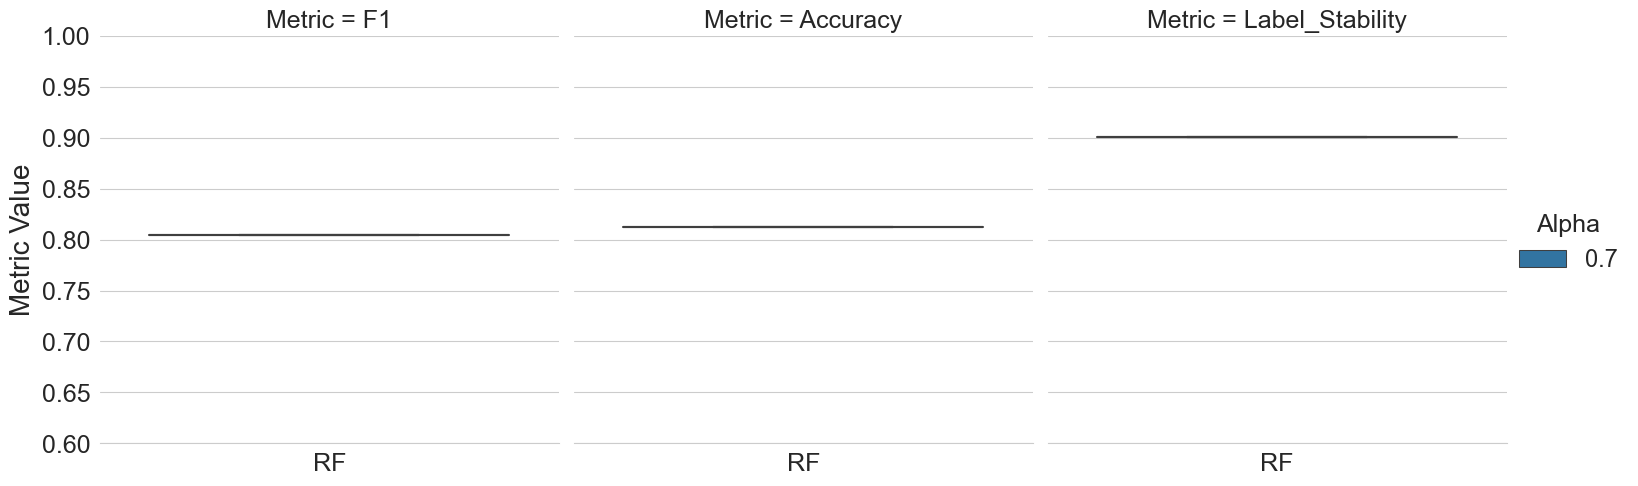

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

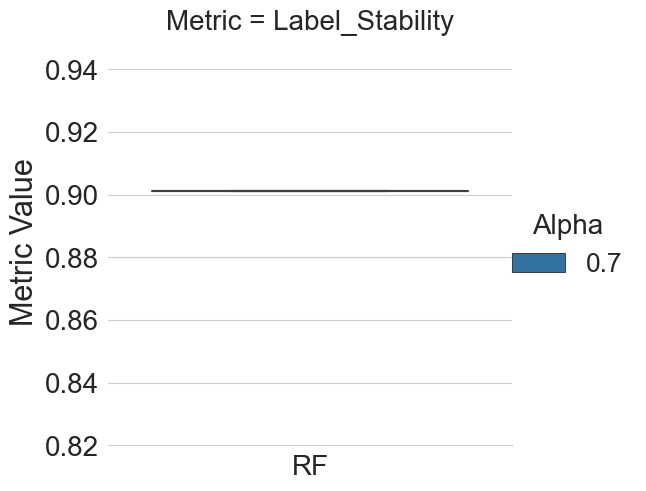

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

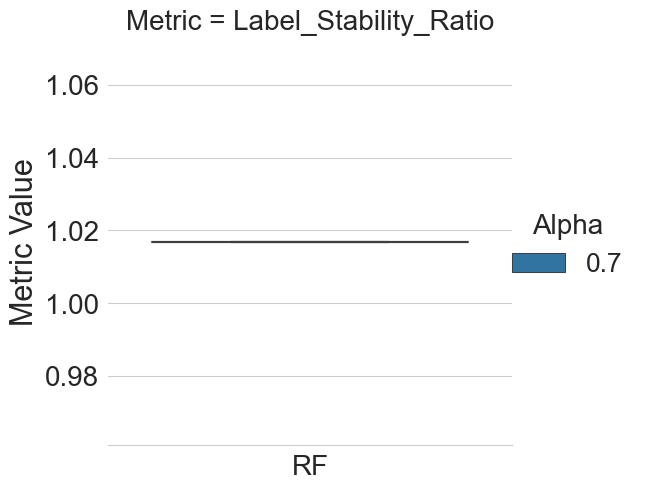

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

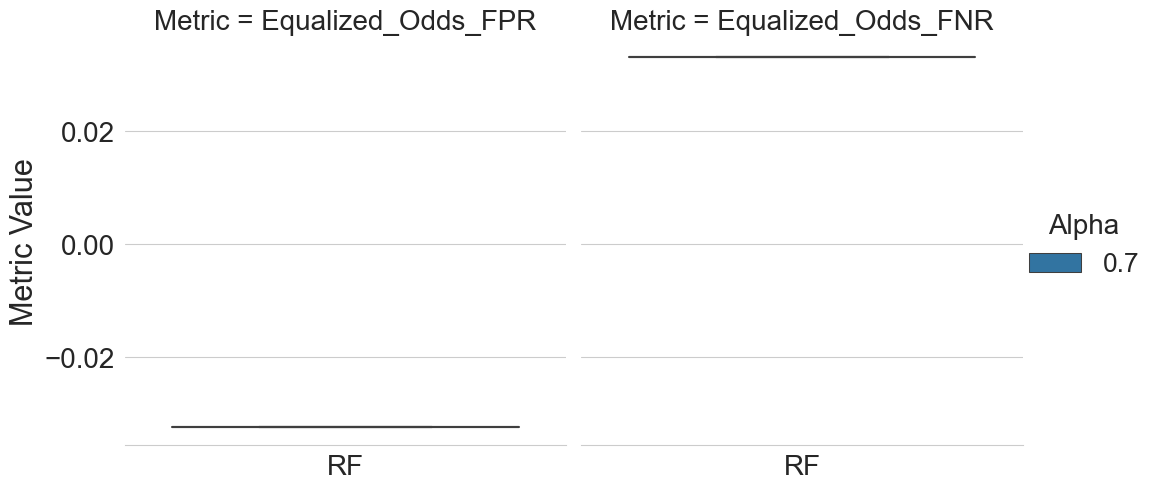

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [22]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

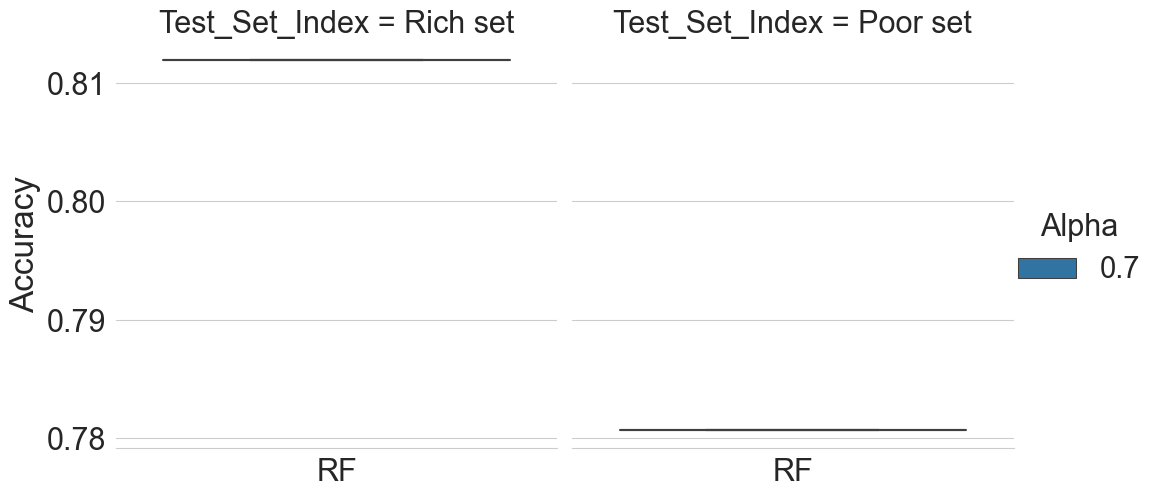

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

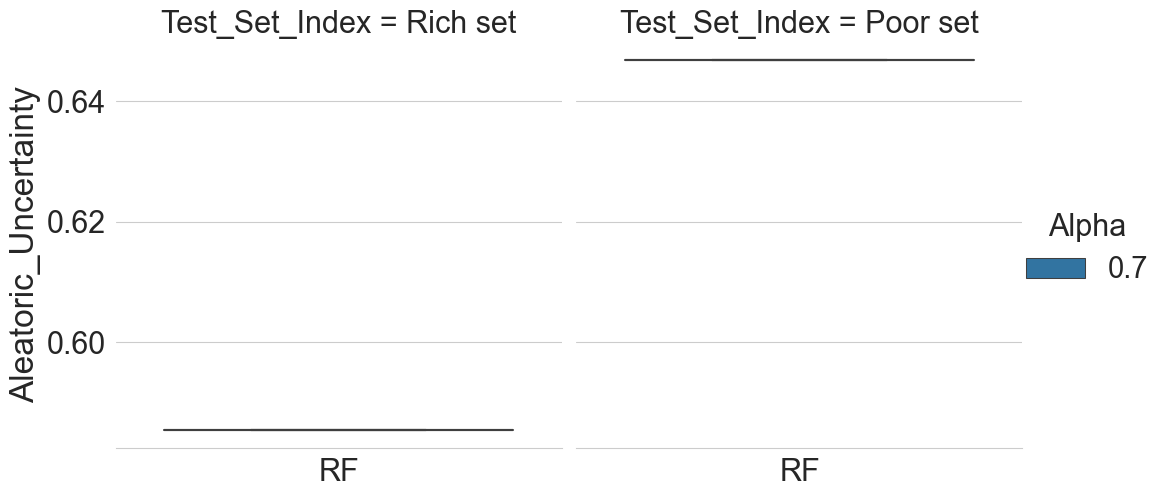

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

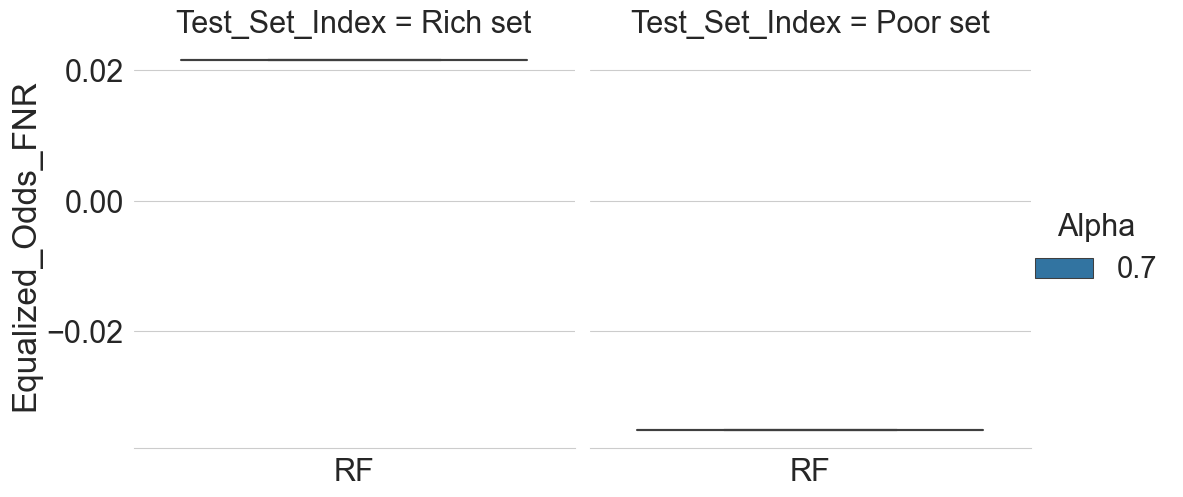

In [25]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)